In [1]:
library(tidyverse)
library(ggplot2)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## 1. Import data from the web, Clean and Wrangle, Summary Statistics

In [2]:
# import data
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip",temp)
pulsar <- read.csv(unz(temp, "HTRU_2.csv"), header = FALSE, 
                   col.names = c("integr.mean", "integr.std", "integr.kurtosis", "integr.skewness",
                                 "DMSNR.mean", "DMSNR.std", "DMSNR.kurtosis", "DMSNR.skewness",
                                 "Class"))
pulsar <- mutate(pulsar, Class = as.factor(Class))

In [4]:
# view the data
head(pulsar, 5)

,integr.mean,integr.std,integr.kurtosis,integr.skewness,DMSNR.mean,DMSNR.std,DMSNR.kurtosis,DMSNR.skewness,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
2,102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
3,103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
4,136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
5,88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0


In [6]:
 # dimension of the data set 
dim(pulsar) 

[1] 17898     9

- 17898 observations
- 9 variables

In [18]:
# summary statistics for each predictor variables
summary_table <- data.frame(cbind(summary(pulsar$integr.mean), summary(pulsar$integr.std),
                                  summary(pulsar$integr.kurtosis), summary(pulsar$integr.skewness),
                                  summary(pulsar$DMSNR.mean), summary(pulsar$DMSNR.std), 
                                  summary(pulsar$DMSNR.kurtosis), summary(pulsar$DMSNR.skewness))) 
colnames(summary_table) <- c("integr.mean", "integr.std", "integr.kurtosis", "integr.skewness",
                "DMSNR.mean", "DMSNR.std", "DMSNR.kurtosis", "DMSNR.skewness")
summary_table

,integr.mean,integr.std,integr.kurtosis,integr.skewness,DMSNR.mean,DMSNR.std,DMSNR.kurtosis,DMSNR.skewness
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min.,5.8125,24.77204,-1.87601118,-1.7918860,0.2132107,7.370432,-3.139270,-1.976976
1st Qu.,100.9297,42.37602,0.02709812,-0.1885717,1.9230769,14.437332,5.781506,34.960504
Median,115.0781,46.94748,0.22324002,0.1987104,2.8018395,18.461316,8.433515,83.064556
Mean,111.0800,46.54953,0.47785726,1.7702790,12.6143997,26.326515,8.303556,104.857709
3rd Qu.,127.0859,51.02320,0.47332518,0.9277831,5.4642559,28.428104,10.702959,139.309330
Max.,192.6172,98.77891,8.06952205,68.1016217,223.3921405,110.642211,34.539844,1191.000837


|   | integr.mean    |  integr.std  |integr.kurtosis |integr.skewness |  DMSNR.mean     |  DMSNR.std    |DMSNR.kurtosis |DMSNR.skewness   |Class   |
|:--|:---------------|:-------------|:---------------|:---------------|:----------------|:--------------|:--------------|:----------------|:-------|
|Min.    | 5.812 | 24.77 | -1.8760 |  -1.7919 | 0.2132 | 7.37 | -3.139 | -1.977 | 0:16259 |
|1st Qu.   | 100.930 | 42.38 | 0.0271 | -0.1886 | 1.9231 | 14.44 | 5.782 | 34.961 |1: 1639 |
|Median   | 115.078 | 46.95 | 0.2232 | 0.1987 | 2.8018 | 18.46 | 8.434 |83.065 |NA      |
|Mean    | 111.080 | 46.55 | 0.4779 | 1.7703 |  12.6144 |  26.33 |  8.304 |  104.858 |NA      |
|3rd Qu.   | 127.086 | 51.02 | 0.4733 |  0.9278 |  5.4643 | 28.43 | 10.703 | 139.309 |NA      |
|Max.   | 192.617 | 98.78 |  8.0695 | 68.1016 | 223.3921 | 110.64 | 34.540 | 1191.001 |NA      |

In [24]:
# check missing data in the data set
sum(is.na(pulsar)) # no missing data

[1] 0

In [26]:
# check number of observations in each class
pulsar %>% 
    group_by(Class) %>% 
    summarise(n=n()) 

Class,n
<fct>,<int>
0,16259
1,1639


- `0 is negative examples`
- `1 is positive examples`
- the class is not balance
- majority (around 90%) of the data are in class 0

## 2. Split into training and testing sets

In [27]:
#split into training and testing sets
set.seed(123)
pulsar_split <- initial_split(pulsar, prop = 0.75, strata = Class)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

## 3. summary statistics and visualization for training set

In [28]:
# summary statistics for each predictor variables in the training set
train_summary_table <- data.frame(cbind(summary(pulsar_train$integr.mean), summary(pulsar_train$integr.std),
                                  summary(pulsar_train$integr.kurtosis), summary(pulsar_train$integr.skewness),
                                  summary(pulsar_train$DMSNR.mean), summary(pulsar_train$DMSNR.std), 
                                  summary(pulsar_train$DMSNR.kurtosis), summary(pulsar_train$DMSNR.skewness))) 
colnames(train_summary_table) <- c("integr.mean", "integr.std", "integr.kurtosis", "integr.skewness",
                "DMSNR.mean", "DMSNR.std", "DMSNR.kurtosis", "DMSNR.skewness")
train_summary_table

,integr.mean,integr.std,integr.kurtosis,integr.skewness,DMSNR.mean,DMSNR.std,DMSNR.kurtosis,DMSNR.skewness
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min.,5.8125,24.77204,-1.73802076,-1.7918860,0.2132107,7.370432,-3.139270,-1.964998
1st Qu.,100.8711,42.32653,0.02666699,-0.1893685,1.9197324,14.433921,5.738328,34.342274
Median,115.1016,46.94269,0.22292516,0.2015270,2.8018395,18.479838,8.438091,83.101613
Mean,110.9337,46.52999,0.48564826,1.8315526,12.6908457,26.311941,8.296929,104.732402
3rd Qu.,127.0156,51.06213,0.47250609,0.9312469,5.5150502,28.548801,10.718749,139.471175
Max.,190.4219,98.77891,8.06952205,68.1016217,223.3921405,107.431823,34.539844,1191.000837


In [29]:
# number of observations in each class
count_train <- pulsar_train %>% group_by(Class) %>% summarise(n=n()) # severe imbalanced training set
count_train

Class,n
<fct>,<int>
0,12170
1,1253


- imbalanced class in training set
- majority (around 90%) of the data are in class 0

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



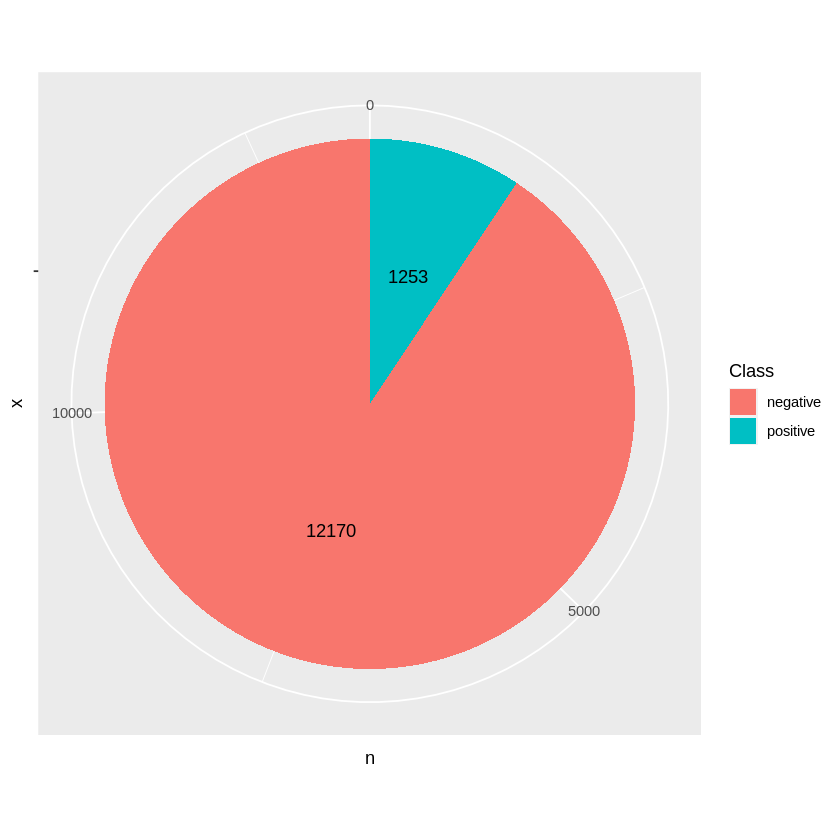

In [32]:
# pie chart to visualize the imbalance in training set
ggplot(count_train, aes(x = "", y = n, fill = Class)) +
  geom_bar(stat = "identity") + 
  geom_text(aes(label = n), position = position_stack(vjust = 0.5)) + 
  coord_polar(theta = "y", start = 0) + 
  scale_fill_brewer(palette = 'Pastel1') + 
  scale_fill_discrete(labels = c("negative", "positive"))

In [40]:
# means of all the predictor variables
predictors_mean <- pulsar_train %>% 
    select(-Class) %>% 
    colMeans() %>%
    data.frame()
colnames(predictors_mean) <- "mean"
predictors_mean

,mean
,<dbl>
integr.mean,110.9336685
integr.std,46.5299873
integr.kurtosis,0.4856483
integr.skewness,1.8315526
DMSNR.mean,12.6908457
DMSNR.std,26.3119413
DMSNR.kurtosis,8.2969288
DMSNR.skewness,104.7324020


#### large difference in means --> need to scale the data???

In [51]:
# correlation matrix between each variables
cor(mutate(pulsar_train, Class = as.numeric(Class)))

,integr.mean,integr.std,integr.kurtosis,integr.skewness,DMSNR.mean,DMSNR.std,DMSNR.kurtosis,DMSNR.skewness,Class
integr.mean,1.0000000,0.550625718,-0.8754877,-0.7420341,-0.297175695,-0.31739224,0.24012967,0.14737891,-0.6793504
integr.std,0.5506257,1.000000000,-0.5272593,-0.5441407,0.006898635,-0.05760089,0.03473675,0.03128017,-0.3737903
integr.kurtosis,-0.8754877,-0.527259342,1.0000000,0.9470364,0.412493085,0.44249987,-0.34633738,-0.21808471,0.7947495
integr.skewness,-0.7420341,-0.544140671,0.9470364,1.0000000,0.414817165,0.42511532,-0.33449311,-0.20868868,0.7121971
DMSNR.mean,-0.2971757,0.006898635,0.4124931,0.4148172,1.000000000,0.79120665,-0.61563906,-0.35345324,0.3992467
DMSNR.std,-0.3173922,-0.057600893,0.4424999,0.4251153,0.791206653,1.00000000,-0.81092428,-0.57743284,0.4999757
DMSNR.kurtosis,0.2401297,0.034736746,-0.3463374,-0.3344931,-0.615639062,-0.81092428,1.00000000,0.92347416,-0.3959351
DMSNR.skewness,0.1473789,0.031280171,-0.2180847,-0.2086887,-0.353453242,-0.57743284,0.92347416,1.00000000,-0.2623431
Class,-0.6793504,-0.373790289,0.7947495,0.7121971,0.399246666,0.49997574,-0.39593507,-0.26234310,1.0000000


#### `Class` has been tranformed into a dummy variable: has values equal to either 0 or 1.
- `0 is negative examples`
- `1 is positive examples`

#### looking at the last column of the matrix, variables from integrated profile have higher correlation with Class:
`integrated mean`, `integrated.kurtosis`, `integrated.skewness` have the largest absolute corralation value with `Class`

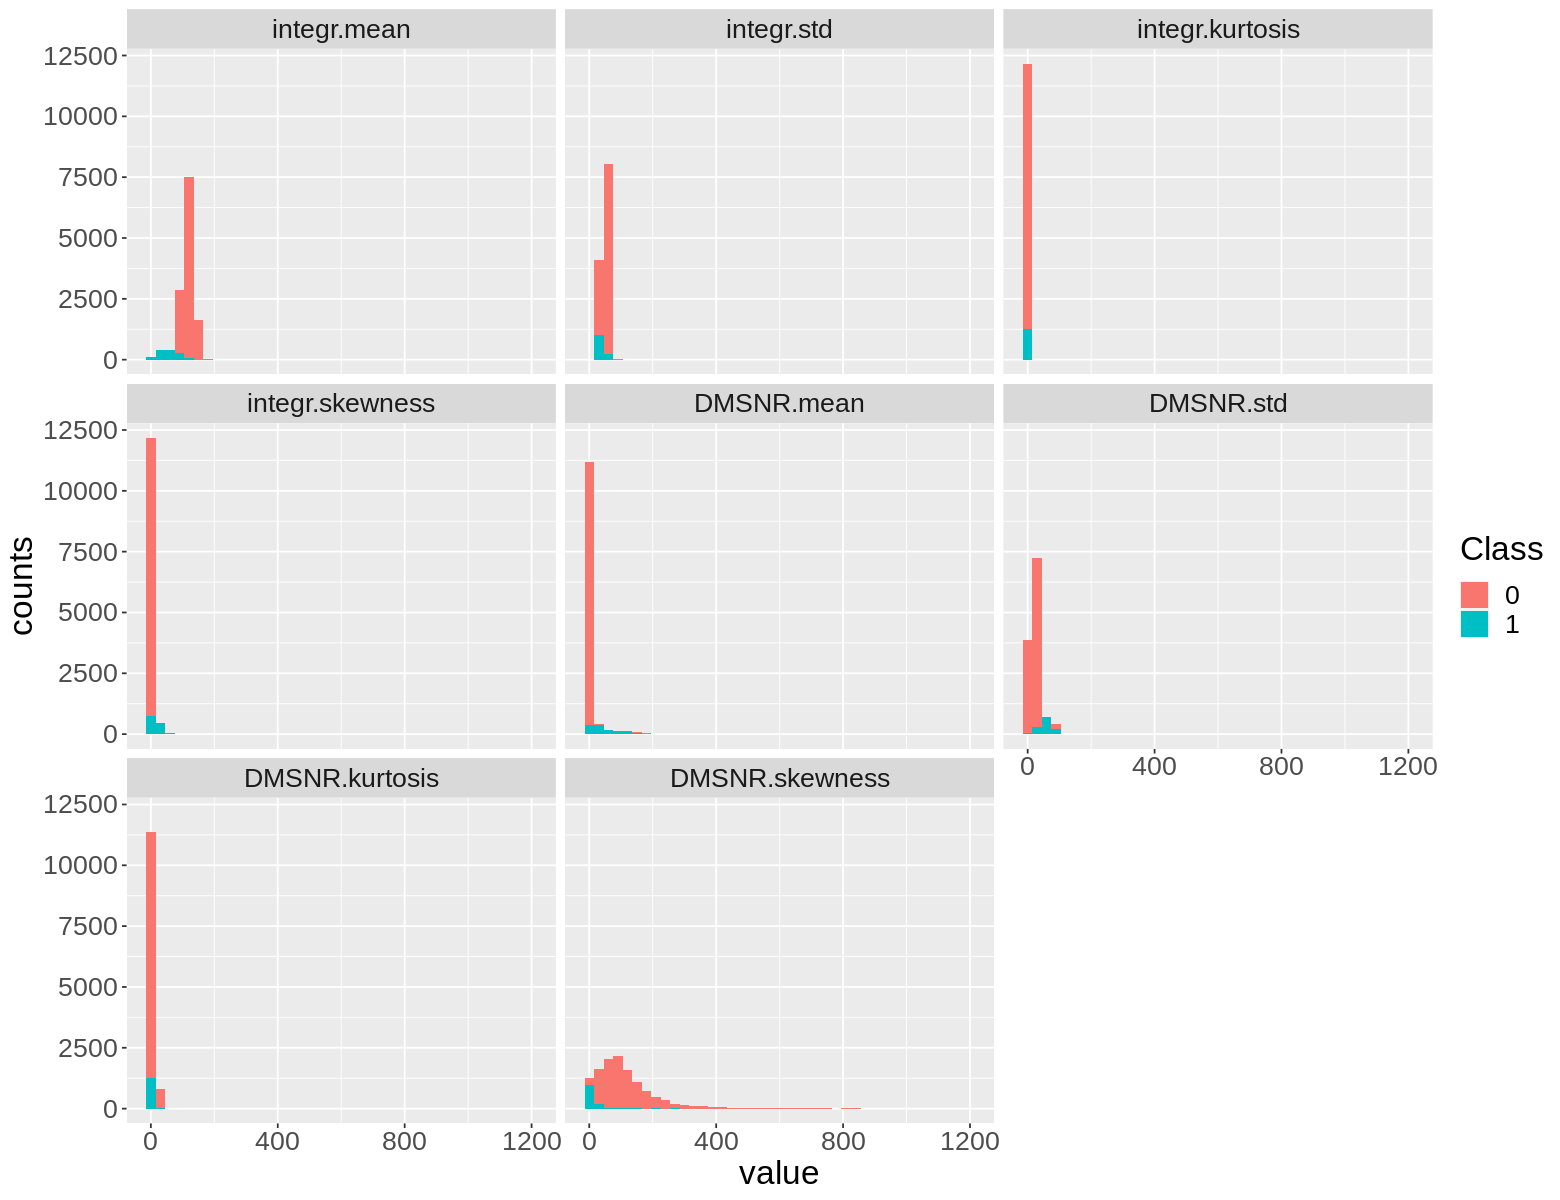

In [57]:
# visualize the training set
# compares the distributions of each of the predictor variables
pivot_train <- pulsar_train %>%
  pivot_longer(cols = integr.mean:DMSNR.skewness,
               names_to = "predictor", 
               values_to = "value")
####
#### histogram for all 8 variables
options(repr.plot.width = 13, repr.plot.height = 10) 
pivot_train %>% 
  ggplot(aes(x = value, fill = Class)) + 
  geom_histogram(position = "identity", binwidth = 30) + 
  facet_wrap(~ factor(predictor, 
                      levels = c("integr.mean", "integr.std", "integr.kurtosis", "integr.skewness",
                                 "DMSNR.mean", "DMSNR.std", "DMSNR.kurtosis", "DMSNR.skewness"))) +
  xlab("value") + 
  ylab("counts") +
  theme(text = element_text(size=20))